In [2]:
!pip install pandas_datareader


  Using cached pandas_datareader-0.9.0-py3-none-any.whl (107 kB)


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [4]:
df=web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,19.121429,18.178572,18.233213,19.006071,659492400.0,16.516520
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [6]:
df.shape

(2016, 6)

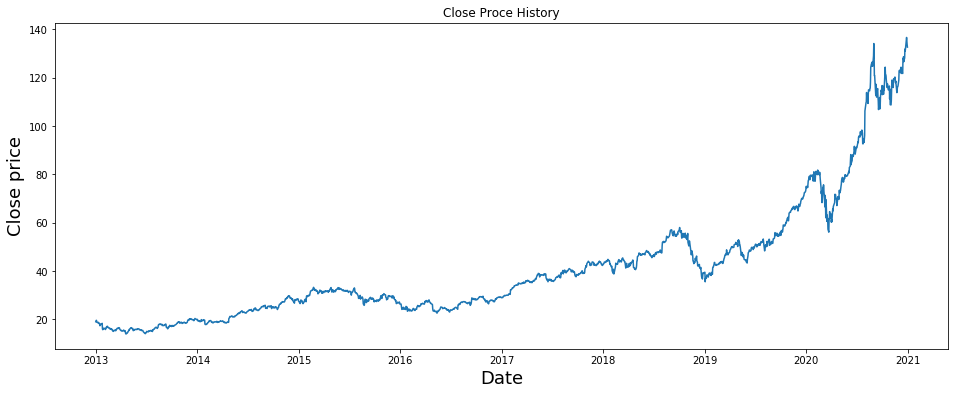

In [9]:
plt.figure(figsize=(16,6))
plt.title("Close Proce History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.show()

In [12]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len
data

,Close
Date,
2012-12-31,19.006071
2013-01-02,19.608213
2013-01-03,19.360714
2013-01-04,18.821428
2013-01-07,18.710714
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.04121287],
       [0.04611861],
       [0.04410219],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [13]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [15]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [21]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1553, 60, 1)

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [24]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1553/1553 [==============================] - 106s 69ms/sample - loss: 3.5858e-04


In [25]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [26]:
x_test=np.array(x_test)

In [27]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [28]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [30]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

7.947490313508671

C:\Users\avish\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


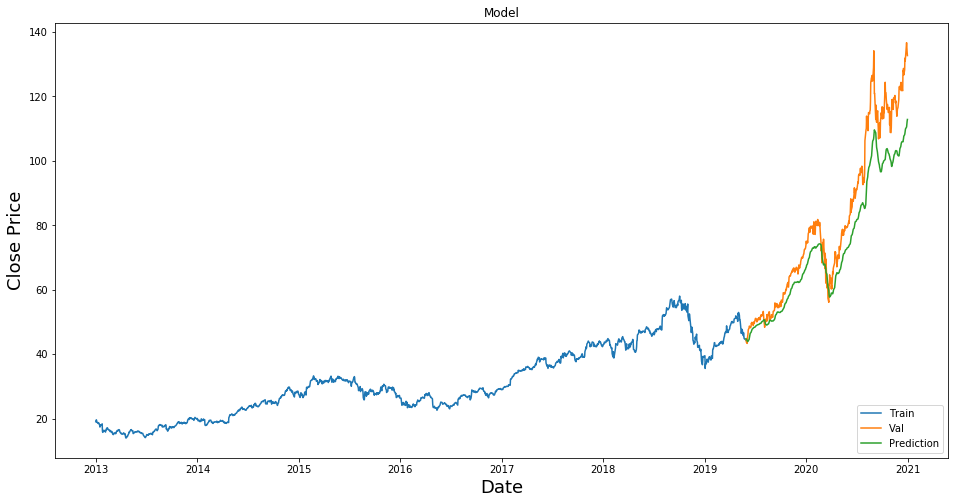

In [31]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [32]:
valid

,Close,Predictions
Date,,
2019-05-30,44.575001,44.770550
2019-05-31,43.767502,44.530849
2019-06-03,43.325001,44.276321
2019-06-04,44.910000,44.000450
2019-06-05,45.634998,43.896297
...,...,...
2020-12-24,131.970001,109.894005
2020-12-28,136.690002,110.518929
2020-12-29,134.869995,111.490677


In [38]:
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2020-12-31')
new_df=apple_quote.filter(['Close'])
last_60=new_df[-60:].values
last_60_scaled=scaler.transform(last_60)
X_test=[]
X_test.append(last_60_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[113.10905]]


In [39]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2020-01-01',end='2020-01-01')

In [40]:
apple_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600,72.675339
